In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_col=['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=dataset[feature_col]
y=dataset.Outcome

In [ ]:
#train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [ ]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
#efficiency or evaluation parameters
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_pred,Y_test)

In [ ]:
confusion_matrix

array([[91, 21],
       [11, 31]])

In [ ]:
#Homework
Work over designing(mathematical) model of logistic Regression for Multi-Class Classification.

Here's an example demonstrating multi-class logistic regression using the One-vs-Rest strategy with a sample dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load a multi-class dataset
iris = load_iris()
X_multi, y_multi = iris.data, iris.target

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model with OvR
# The 'multi_class' parameter is set to 'ovr' for One-vs-Rest
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear') # Using 'liblinear' solver for small datasets
model_ovr.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_ovr = model_ovr.predict(X_test_multi)

# Evaluate the model
accuracy_ovr = accuracy_score(y_test_multi, y_pred_ovr)
print(f"Accuracy using One-vs-Rest: {accuracy_ovr}")

Accuracy using One-vs-Rest: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


This code loads the Iris dataset (which has three classes), splits it into training and testing sets, and then trains a Logistic Regression model with `multi_class='ovr'` to perform multi-class classification using the One-vs-Rest strategy. The accuracy of the model on the test set is then printed.

## Mathematical Model of Logistic Regression for Multi-Class Classification

While the logistic regression model we used for binary classification in this notebook is straightforward, extending it to handle multiple classes requires a slightly different approach. One common method is the **One-vs-Rest (OvR)** or **One-vs-All (OvA)** strategy.

Here's how the mathematical model works for OvR:

1.  **For each class**, a separate binary logistic regression model is trained. For example, if you have classes A, B, and C in your `dataset`, you would train:
    *   A model to distinguish class A from all other classes (B and C).
    *   A model to distinguish class B from all other classes (A and C).
    *   A model to distinguish class C from all other classes (A and B).

2.  Each of these binary models uses the standard logistic regression sigmoid function ($\sigma(z) = \frac{1}{1 + e^{-z}}$) to estimate the probability of a data point belonging to the positive class (the class being distinguished). The input to the sigmoid function, $z$, is a linear combination of the features and their corresponding weights: $z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$, where $\beta_i$ are the weights and $x_i$ are the features from your `dataset`.

3.  **During prediction**, for a new data point, each of the binary models calculates the probability of the data point belonging to its respective positive class.

4.  The class with the **highest predicted probability** among all the binary models is assigned as the final predicted class for the data point.

Another approach is ** multinomial logistic regression**, which directly models the probability of a data point belonging to each class using a softmax function.

The softmax function is a generalization of the sigmoid function and is defined as:
$$P(y=k | x) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}$$
where:
*   $P(y=k | x)$ is the probability of the data point $x$ belonging to class $k$.
*   $z_k$ is the linear combination of features and weights for class $k$.
*   $K$ is the total number of classes.

In this approach, a single model is trained to output probabilities for all classes simultaneously.

For your `dataset`, which appears to be a binary classification problem based on the 'Outcome' column (0 or 1), the binary logistic regression model is appropriate. If you were to extend this to predict multiple categories (e.g., different stages of diabetes), you would need to apply either the OvR or multinomial approach.

In [ ]:
#import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

In [ ]:
x=np.linspace(-10,10,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

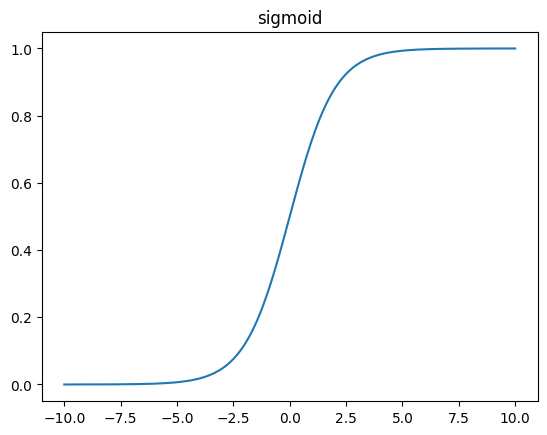

In [ ]:
plot_function(x,sigmoid(x),"sigmoid")

Implement:
Step function
linear function
tanH function
ReLU function
leaky ReLU function

In [ ]:
def linear(x):
  return x

In [ ]:
x=np.linspace(-10,10,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

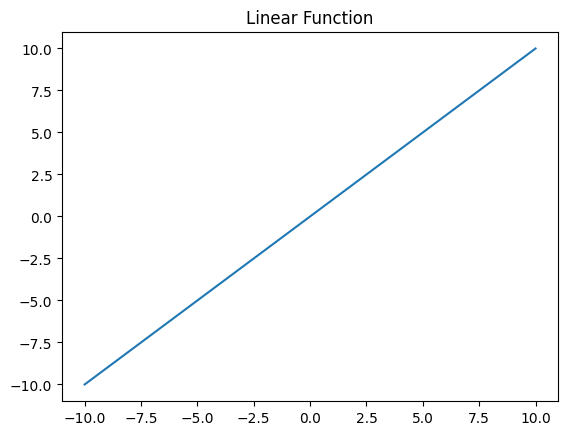

In [ ]:
plot_function(x,linear(x),"Linear Function")

In [ ]:
def step(x):
  return np.where(x>=0,1,0)

In [ ]:
x=np.linspace(-20,20,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

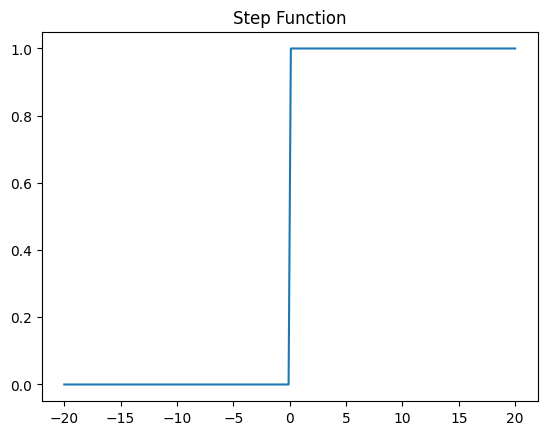

In [ ]:
plot_function(x,step(x),"Step Function")

In [ ]:
def relu(x):
  return np.maximum(0, x)

In [ ]:
x=np.linspace(-10,10,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

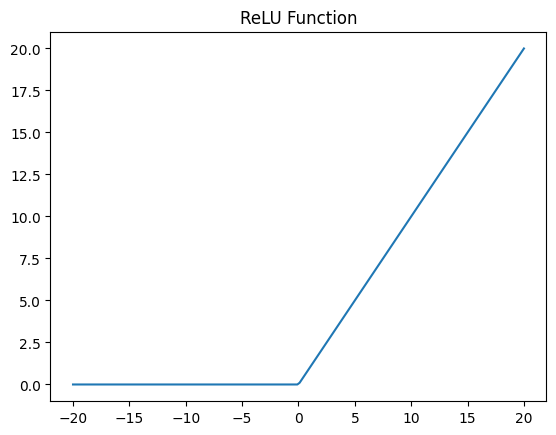

In [ ]:
plot_function(x,relu(x),"ReLU Function")

In [ ]:
def tanh(x):
 return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [ ]:
x=np.linspace(-10,10,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

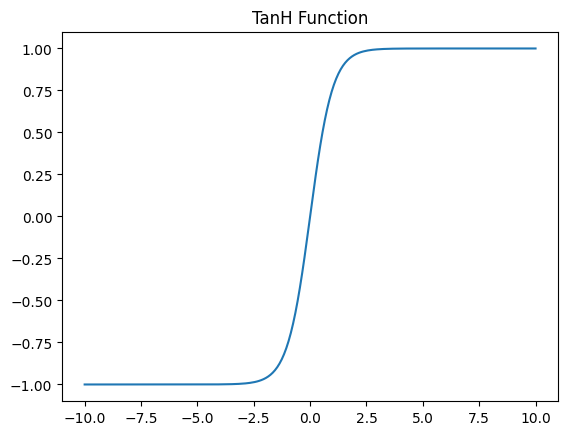

In [ ]:
plot_function(x,tanh(x),"TanH Function")

In [ ]:
def LeakyReLU(x):
 return np.maximum(0.01*x,x)

In [ ]:
x=np.linspace(-10,10,200)
def plot_function(x,y,title):
  plt.plot(x,y,label=title)
  plt.title(title)
  plt.show()

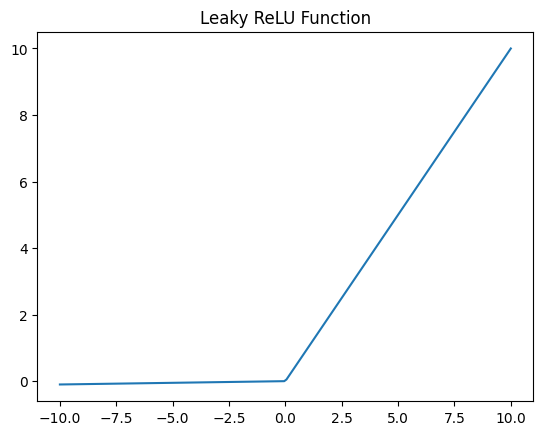

In [ ]:
plot_function(x,LeakyReLU(x),"Leaky ReLU Function")

In [ ]:
def softmax(x):
  """Compute softmax values for each set of scores in x."""
  e1=(np.exp(x-np.max(x)))
  return (e1/np.sum(e1,axis=0))

In [ ]:
z=np.array([0.90,0.10,0.40])
softmax(z)

array([0.48641453, 0.21856014, 0.29502533])

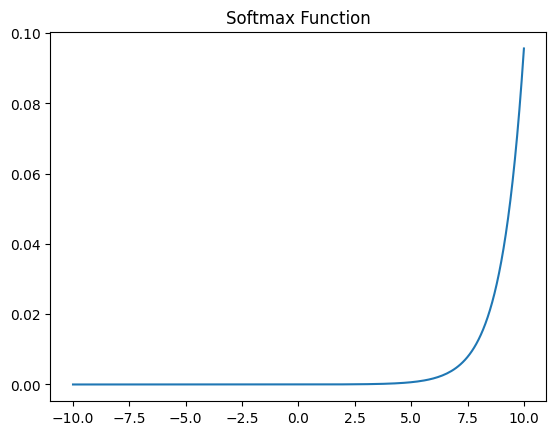

In [ ]:
plot_function(x,softmax(x),"Softmax Function")

Implement seven gates in logistic regression:
AND, NOT,NOR,OR,XOR,XNOR,NAND.
Identify values of W1,W2,b and sigma.